In [1]:
!pip install kaggle

  Using cached https://files.pythonhosted.org/packages/a6/a5/c0b6468d3824fe3fde30dbb5e1f687b291608f9473681bbf7dabbf5a87d7/text_unidecode-1.3-py2.py3-none-any.whl
You are using pip version 9.0.3, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json

# Career Exploration Final Project: TMDB Box Office Prediction

### Table Of Contents

* [1. Exploratory Data Analysis](#eda)
* [2. Feature Engineering and Data Cleaning](#feature-engineering)
* [3. Modeling](#modeling)
    * [3.1 Validation and Evaluation](#validation)
    * [3.2 Linear Regression](#linear-regression)
    * [3.3 Regularized Regression](#reg)
    * [3.4 Random Forest](#random-forest)
    * [3.5 Neural Network](#nn)
    * [3.6 XGBoost](#xgb)


### Hosted by and maintained by the [Students Association of Applied Statistics (SAAS)](https://saas.berkeley.edu).  Authored by [Ajay Raj](mailto:araj@berkeley.edu).

For your final project in Career Exploration, you will be participating in a **Kaggle competition**, a data science and machine learning competition where you use *real* data and develop models to solve *real* problems.

## Description

The problem: given data about a movie (runtime, budget, cast, crew), predict the **overall worldwide box office revenue** it will make.

You'll be competing in [this Kaggle competition](https://www.kaggle.com/c/tmdb-box-office-prediction). Note that this competition has already completed, so you won't be competing against other Kagglers, but you'll be competing against your fellow CXers on a private leaderboard. For information on where the training data came from and how you're predictions are evaluated (turned into a score), check out the Kaggle competition link.

**Note:** There is not much guidance provided in this project (on purpose). You'll be doing a lot of going through [previous lectures](https://github.com/SUSA-org/Spring-2019-Career-Exploration/blob/master/CX-Final-Project/CX-Final-Project-Starter.ipynb) to try to adapt the code provided there to this dataset, and reading documentation that's been linked in most of the problems. We are pushing you, fledgling data scientists, out of the nest and letting you spread your wings and fly.

## Setup

1. Create a Kaggle account at kaggle.com
2. Go to the [Kaggle competition page](https://www.kaggle.com/c/tmdb-box-office-prediction) and click the blue button (will either say "Late Submission" or "Join Competition"), and register for the competition!
3. Go to the 'Account' tab of your user profile (https://www.kaggle.com/YOUR-USERNAME/account) and select 'Create API Token'
4. Download the `kaggle.json` file, which contains a dictionary with your Kaggle credentials
5. Put this in the `KAGGLE_USER_DATA` variable

## Data Loading

In [28]:
train = pd.read_csv('data/train.csv')

In [29]:
full= pd.read_csv('data/train.csv')

In [30]:
test = pd.read_csv('data/test.csv')

In [31]:
X_train, y_train = train.drop('revenue', axis=1), train['revenue']
X_test = test

When we do EDA and feature engineering on a dataset, we often examine the training points and the test points together, so when you do complex feature engineering and data cleaning, you don't need to do twice or worry about your transformations not applying to test set.

In [32]:
df = pd.concat((X_train, X_test), axis=0)

<span id="eda"></span>

## 1. Exploratory Data Analysis

Provide two plots that demonstrate interesting aspects of the dataset, and especially certain features' influence on the target variable, revenue.

Since you won't be "submitting" this notebook anywhere, this part of the project is technically optional, but it is a **crucial** part of the data science process, so we *highly* recommend you do this, because it will inform how you complete the next parts of the project.

In [33]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


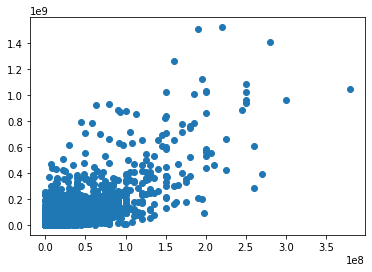

In [34]:
x=train[['budget']]
y=train[['revenue']]

plt.scatter(x,y)


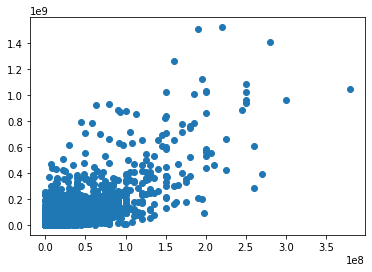

In [35]:
x=train[['budget']]
y=train[['revenue']]

plt.scatter(x,y)

Text(0.5, 1.0, 'Distribution of the budget of the Game')

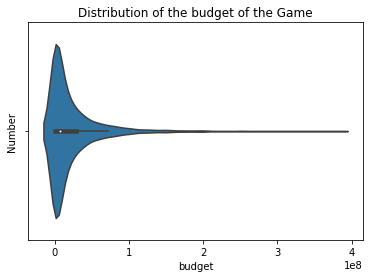

In [36]:
sns.violinplot(x="budget", data=train)

plt.xlabel("budget")
plt.ylabel("Number")
plt.title("Distribution of the budget of the Game")

## 2. Feature Engineering and Data Cleaning

Transform your data into a cleaned DataFrame with the features you believe will be the most helpful towards creating a model for the revenue from the film.

In order to use the models below, you will need to make every feature **numerical**, not categorical, so you need to make sure that your output DataFrame only has numbers in it (and no NaNs!).

In [37]:
pd.isnull(train).sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [38]:
train_dropped_col = train.drop(['belongs_to_collection','homepage','tagline'], axis=1)
train_dropped_col.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


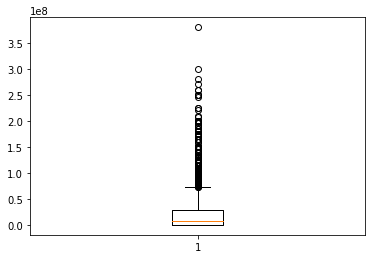

In [39]:
plt.boxplot(train['budget']);

(2751, 23)


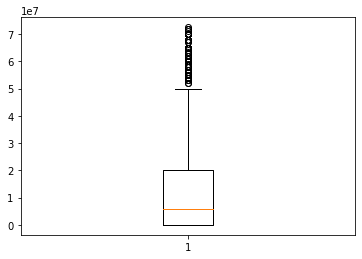

In [40]:
q1 = train['budget'].quantile(.25)
q3 = train['budget'].quantile(.75)
iqr = q3 - q1

within_range = (q1 - 1.5*iqr <= train['budget']) & (train['budget'] <= q3 + 1.5*iqr)

train_outiers_removed = train[within_range]
print(train_outiers_removed.shape)
plt.boxplot(train_outiers_removed['budget']);

In [41]:
train = pd.get_dummies(train, columns=['original_language', 'status'])
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_title,overview,popularity,poster_path,...,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh,status_Released,status_Rumored
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,0,0,0,0,0,0,0,0,1,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,0,0,0,0,0,0,0,0,1,0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,0,0,0,0,0,0,0,0,1,0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,0,0,0,0,0,0,0,0,1,0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,0,0,0,0,0,0,0,0,1,0


Some of the columns have data that is a little funky, so here's the libraries I imported and a few functions that I used. Feel free to use them or not!

In [42]:
from sklearn.decomposition import PCA
from collections import defaultdict
from sklearn.preprocessing import StandardScaler

def empty_listify(lst):
    return [] if pd.isnull(lst) else eval(lst)

def pcaify(one_hot, column_prefix, num_pca_columns):
    pca = PCA(n_components=num_pca_columns)    
    features = pca.fit_transform(one_hot)
    
    return pd.DataFrame(data = features, columns = ['{0}_{1}'.format(column_prefix, i) for i in range(features.shape[1])])

In [127]:
def feature_engineering(df):
    df = df.drop(['belongs_to_collection','homepage','tagline','spoken_languages', 'Keywords', 'cast', 'crew', 'original_title','original_title','production_companies', 'production_companies', 'title','genres','overview','imdb_id', 'poster_path', 'production_countries', 'release_date'], axis=1)
    
    q1 = df['budget'].quantile(.25)
    q3 = df['budget'].quantile(.75)
    iqr = q3 - q1
    within_range = (q1 - 1.5*iqr <= df['budget']) & (df['budget'] <= q3 + 1.5*iqr)
    train_outiers_removed = df[within_range]
    df = pd.get_dummies(df, columns=['original_language', 'status'])
 
    return df 

In [128]:
X = feature_engineering(full)

In [129]:
X.head()

,id,budget,popularity,runtime,revenue,original_language_ar,original_language_bn,original_language_cn,original_language_cs,original_language_da,...,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh,status_Released,status_Rumored
0,1,14000000,6.575393,93.0,12314651,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,40000000,8.248895,113.0,95149435,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,3300000,64.299990,105.0,13092000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1200000,3.174936,122.0,16000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,1.148070,118.0,3923970,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [130]:
# Splitting up our cleaned df back into training and test
X_train = X[:train.shape[0]]
y_train = y_train
X_test = X[train.shape[0]:]

<span id="modeling"/>

## 3. Modeling

For each of the models we try, make sure you also run the [Prediction](#prediction) cells at the bottom, so you can submit your predictions to the competition! This is how we'll be making sure you're keeping up with the project.

<span id="validation"/>

### 3.1 Validation and Evaluation

Our Kaggle competition (read more [here](https://www.kaggle.com/c/tmdb-box-office-prediction/overview/evaluation) uses Root-Mean-Square-Log-Error (RMSLE). In mathematical notation, it is:

$$\text{RMSLE}(\hat{y}, y) = \sqrt{\frac{1}{n} \sum_{i = 1}^n \log(y_i - \hat{y}_i)}$$

#### Evaluation

Complete the function below.

In [131]:
from sklearn.metrics import mean_squared_log_error

def evaluate(y_pred, y_true):    
    """Returns the RMSLE(y_pred, y_true)"""
    return np.sqrt(mean_squared_log_error(y_pred, y_true))

In [132]:
# Tests the previous function

# If this fails, it will throw an error
np.allclose(evaluate(np.array([1, 2, 3, 4]), np.array([5, 6, 7, 8])), 0.8292781201720374)

True

#### Validation

Use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split up your training data into a training set and a validation set. The size of the validation set should be 20% of the full training data.

In [133]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)

<span id="linear-regression"/>

### 3.2 Linear Regression

Fit a linear regression model to your data

In [134]:
from sklearn.linear_model import LinearRegression

In [162]:
linear_model = LinearRegression()

X = train[['budget']]
Y = train[['revenue']]

# Fit the model to the data
linear_model.fit(X, Y)
linear_model.coef_, linear_model.intercept_

(array([[2.79686488]]), array([3708754.79757061]))

<span id="reg" />

### 3.3 Regularized Regression

Fit a [LASSO regression model](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) to your data

In [158]:
from sklearn.linear_model import Lasso

In [159]:
lasso_model = Lasso(alpha=1)

X = train[['budget']]
Y = train[['revenue']]

# Fit the model to the data
lasso_model.fit(X, Y)
lasso_model.coef_, lasso_model.intercept_

(array([2.79686488]), array([3708754.79757057]))

In the future, could try to using RandomForestRegressor and hyper-parameter tuning using 3-KFolds. ALso finish conclusion using test set.